# **Data Pre-processing**

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve, average_precision_score, roc_curve, roc_auc_score, auc
from sklearn import metrics
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/train_dataset.zip')
data.head()

,LTE/5g Category,Time,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,slice Type
0,14,0,0.000001,10,1,0,0,1,0,0,0,0,1,0,0,0,3
1,18,20,0.001000,100,0,1,1,0,1,0,0,0,0,0,0,0,1
2,17,14,0.000001,300,0,1,0,1,0,0,0,0,0,0,0,1,1
3,3,17,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1,1
4,9,4,0.010000,50,1,0,0,1,0,0,0,0,0,1,0,0,2


In [4]:
y = data['slice Type']
y

0        3
1        1
2        1
3        1
4        2
        ..
31578    1
31579    2
31580    2
31581    3
31582    3
Name: slice Type, Length: 31583, dtype: int64

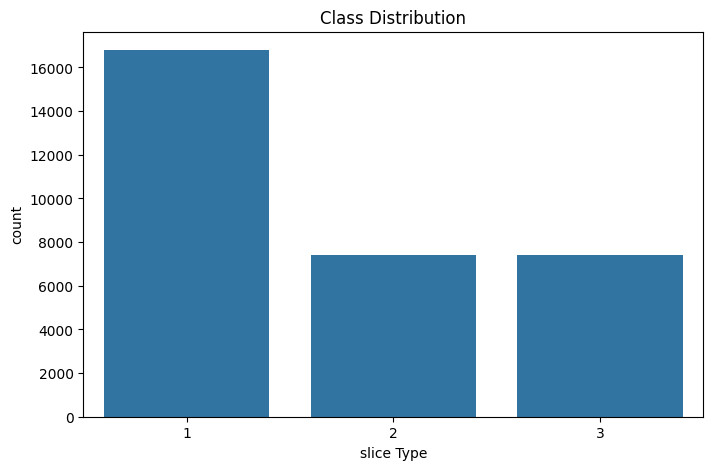

In [5]:
# Class Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=y)
plt.title('Class Distribution')
plt.show()

In [6]:
# features = ['Packet Loss Rate', 'Packet delay', 'IoT',	'LTE/5G',	'GBR',	'Non-GBR']
# features = ['Packet Loss Rate', 'IoT',	'LTE/5G',	'GBR',	'Non-GBR']
# features = ['Packet Loss Rate', 'Packet delay']
# features = ['Packet Loss Rate']

# features = ['AR/VR/Gaming',	'Healthcare',	'Industry 4.0', 'IoT Devices',	'Public Safety',	'Smart City & Home',	'Smart Transportation',	'Smartphone']
# features = ['AR/VR/Gaming',	'Healthcare',	'Industry 4.0', 'Public Safety']
# features = ['IoT Devices',	'Smart City & Home',	'Smart Transportation',	'Smartphone']
# features = ['Smartphone']
# features = ['AR/VR/Gaming',	'Healthcare',	'Industry 4.0', 'IoT Devices',	'Public Safety',	'Smart City & Home',	'Smart Transportation']

features = ['Packet Loss Rate', 'Packet delay', 'IoT',	'LTE/5G',	'GBR',	'Non-GBR', 'AR/VR/Gaming',	'Healthcare',	'Industry 4.0', 'IoT Devices',	'Public Safety',	'Smart City & Home',	'Smart Transportation',	'Smartphone']
# features = ['Packet Loss Rate', 'IoT',	'LTE/5G',	'GBR',	'Non-GBR', 'AR/VR/Gaming',	'Healthcare',	'Industry 4.0', 'IoT Devices',	'Public Safety',	'Smart City & Home',	'Smart Transportation',	'Smartphone']
# features = ['Packet Loss Rate', 'Packet delay', 'AR/VR/Gaming',	'Healthcare',	'Industry 4.0', 'IoT Devices',	'Public Safety',	'Smart City & Home',	'Smart Transportation',	'Smartphone']
# features = ['Packet Loss Rate', 'Packet delay', 'AR/VR/Gaming',	'Healthcare',	'Industry 4.0', 'IoT Devices',	'Public Safety',	'Smart City & Home',	'Smart Transportation']
# features = ['Packet Loss Rate', 'AR/VR/Gaming',	'Healthcare',	'Industry 4.0', 'IoT Devices',	'Public Safety',	'Smart City & Home',	'Smart Transportation',	'Smartphone']

X = data[features]
X

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone
0,0.000001,10,1,0,0,1,0,0,0,0,1,0,0,0
1,0.001000,100,0,1,1,0,1,0,0,0,0,0,0,0
2,0.000001,300,0,1,0,1,0,0,0,0,0,0,0,1
3,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1
4,0.010000,50,1,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31578,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1
31579,0.010000,50,1,0,0,1,0,0,0,0,0,1,0,0
31580,0.010000,300,1,0,1,0,0,0,0,1,0,0,0,0
31581,0.000001,10,1,0,0,1,0,1,0,0,0,0,0,0


In [7]:
# # Feature Analysis
# pair_plot_data = pd.concat([X, y], axis=1)
# sns.pairplot(data=pair_plot_data, hue="slice Type")
# plt.suptitle('Pair Plot for the Dataset', y=1.02)
# plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
X_train

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone
29412,0.000001,60,0,1,1,0,0,0,0,0,0,0,0,1
15104,0.010000,50,1,0,0,1,0,0,0,0,0,1,0,0
13685,0.010000,75,0,1,0,1,0,0,0,0,0,0,0,1
30140,0.001000,150,0,1,0,1,0,0,0,0,0,0,0,1
1395,0.000001,100,0,1,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,0.001000,100,0,1,1,0,1,0,0,0,0,0,0,0
5390,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1
860,0.000001,10,1,0,0,1,0,0,1,0,0,0,0,0
15795,0.000001,60,0,1,1,0,0,0,0,0,0,0,0,1


In [9]:
y_train

29412    1
15104    2
13685    1
30140    1
1395     1
        ..
29802    1
5390     1
860      3
15795    1
23654    2
Name: slice Type, Length: 28424, dtype: int64

In [10]:
X_test

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone
27969,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0
4148,0.010000,300,1,0,1,0,0,0,0,1,0,0,0,0
2527,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0
29112,0.010000,300,1,0,1,0,0,0,0,0,0,1,0,0
2388,0.010000,50,1,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0
1282,0.000001,300,0,1,1,0,0,0,0,0,0,0,0,1
30756,0.010000,300,1,0,1,0,0,0,0,0,0,1,0,0
2310,0.001000,50,1,0,1,0,0,0,1,0,0,0,0,0


In [11]:
y_test

27969    3
4148     2
2527     3
29112    2
2388     2
        ..
1346     3
1282     1
30756    2
2310     2
10004    2
Name: slice Type, Length: 3159, dtype: int64

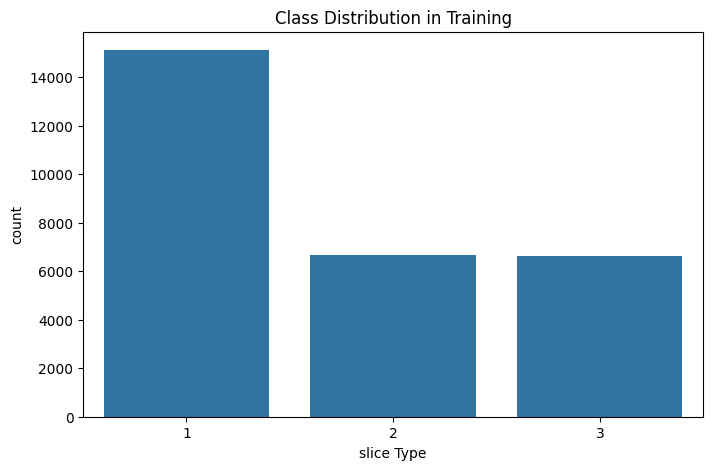

In [12]:
# Class Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=y_train)
plt.title('Class Distribution in Training')
plt.show()

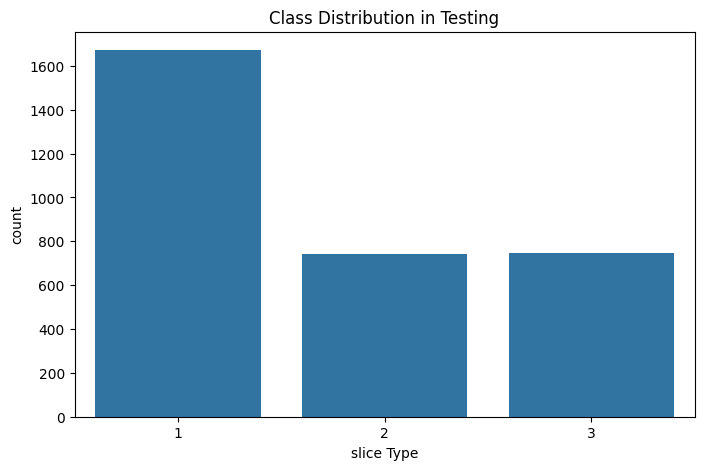

In [13]:
# Class Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=y_test)
plt.title('Class Distribution in Testing')
plt.show()

# **RANDOM FOREST CLASSIFIER**

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
model_RFC = RandomForestClassifier()
model_RFC.fit(X_train, y_train)

RandomForestClassifier()

In [16]:
y_pred_RFC = model_RFC.predict(X_test)

In [17]:
accuracy_RFC = accuracy_score(y_test, y_pred_RFC)
print(f"Accuracy: {accuracy_RFC:.2f}")

Accuracy: 1.00


In [18]:
print(classification_report(y_test, y_pred_RFC))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1672
           2       1.00      1.00      1.00       740
           3       1.00      1.00      1.00       747

    accuracy                           1.00      3159
   macro avg       1.00      1.00      1.00      3159
weighted avg       1.00      1.00      1.00      3159



In [19]:
print(confusion_matrix(y_test, y_pred_RFC))

[[1672    0    0]
 [   0  740    0]
 [   0    0  747]]


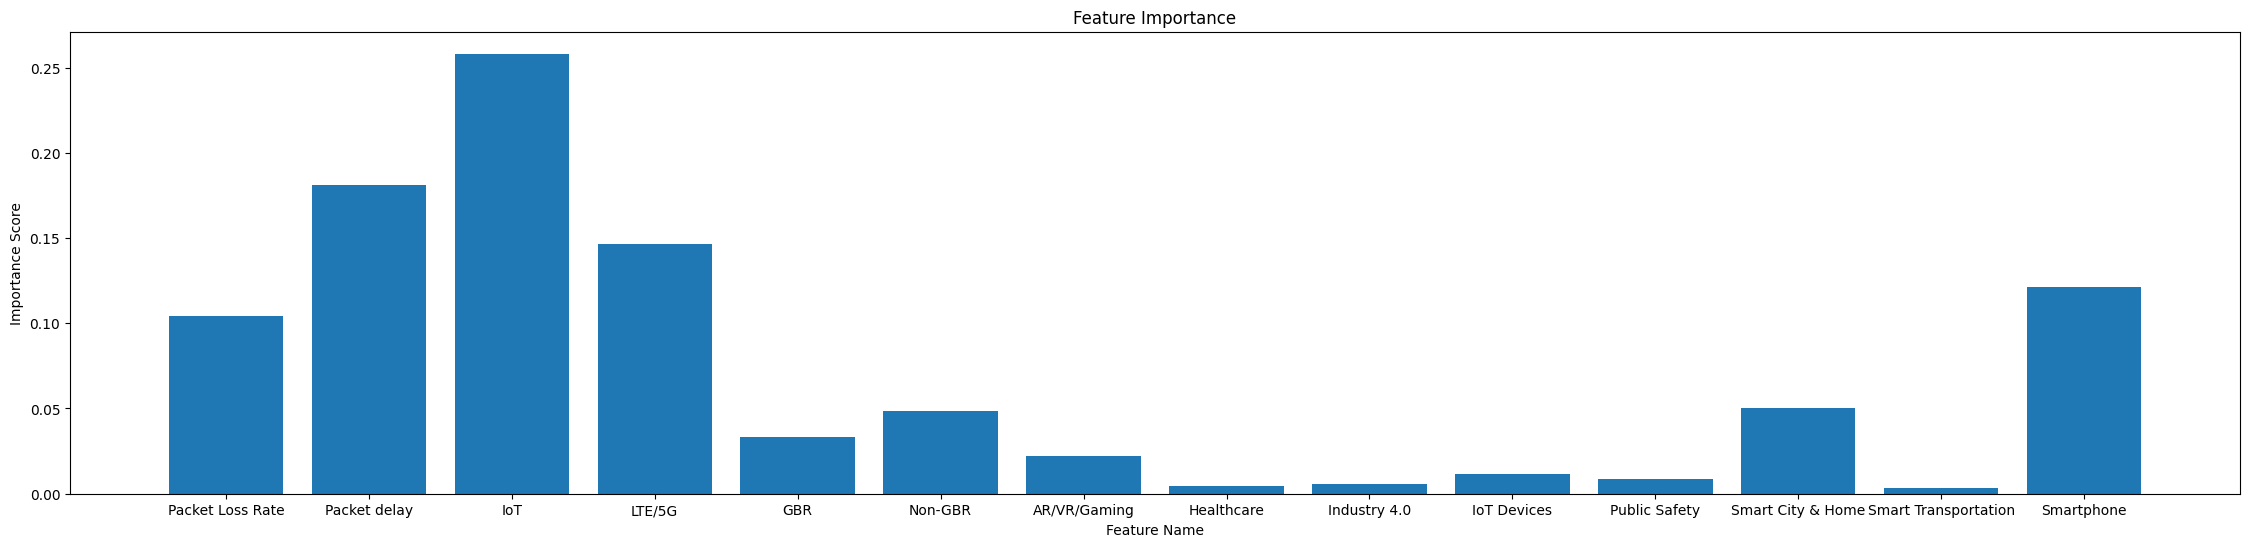

In [20]:
# Feature Importance
feature_importance = model_RFC.feature_importances_
# features = np.arange(len(feature_importance))

plt.figure(figsize=(2 * len(features), 6))
plt.bar(features, feature_importance)
plt.title('Feature Importance')
plt.xlabel('Feature Name')
plt.ylabel('Importance Score')
plt.show()

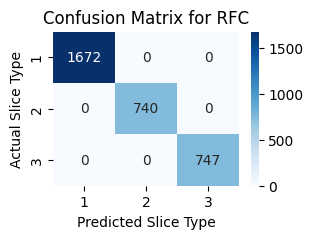

In [28]:
# Confusion Matrix
cm_RFC = confusion_matrix(y_test, y_pred_RFC)
plt.figure(figsize=(3, 2))
sns.heatmap(cm_RFC, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for RFC')
plt.xlabel('Predicted Slice Type')
plt.ylabel('Actual Slice Type')

# # Add a legend to indicate class labels
# classes = np.unique(y)
# plt.xticks(np.arange(len(classes)) + 0.5, classes, rotation=45)
# plt.yticks(np.arange(len(classes)) + 0.5, classes, rotation=0)

plt.show()

In [22]:
# Get the column names from the original DataFrame
X_test_column_names = X.columns.tolist()

# Convert X_test to a pandas DataFrame
X_test_df_RFC = pd.DataFrame(X_test, columns=X_test_column_names)  # Replace X_test_column_names with your actual column names
X_test_with_predictions_RFC = X_test_df_RFC.copy()  # Create a copy to avoid modifying the original DataFrame

# Resetting indices to avoid alignment issues
X_test_with_predictions_RFC.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
y_pred_RFC = pd.Series(y_pred_RFC, name='Predicted_Slice_Type')  # Convert y_pred to a pandas Series

# Add y_test and y_pred columns to the DataFrame
X_test_with_predictions_RFC['Actual_Slice_Type'] = y_test
X_test_with_predictions_RFC['Predicted_Slice_Type'] = y_pred_RFC

In [23]:
X_test_column_names

['Packet Loss Rate',
 'Packet delay',
 'IoT',
 'LTE/5G',
 'GBR',
 'Non-GBR',
 'AR/VR/Gaming',
 'Healthcare',
 'Industry 4.0',
 'IoT Devices',
 'Public Safety',
 'Smart City & Home',
 'Smart Transportation',
 'Smartphone']

In [24]:
X_test_with_predictions_RFC.head(20)

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,Actual_Slice_Type,Predicted_Slice_Type
0,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0,3,3
1,0.010000,300,1,0,1,0,0,0,0,1,0,0,0,0,2,2
2,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0,3,3
3,0.010000,300,1,0,1,0,0,0,0,0,0,1,0,0,2,2
4,0.010000,50,1,0,0,1,0,0,0,0,0,1,0,0,2,2
5,0.010000,300,1,0,1,0,0,0,0,1,0,0,0,0,2,2
6,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0,3,3
7,0.001000,50,1,0,1,0,0,0,1,0,0,0,0,0,2,2
8,0.010000,300,1,0,1,0,0,0,0,1,0,0,0,0,2,2
9,0.010000,300,1,0,1,0,0,0,0,1,0,0,0,0,2,2


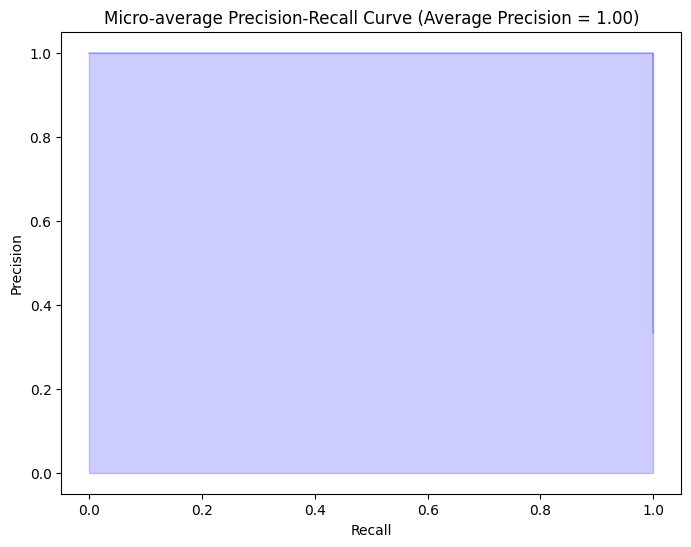

In [25]:
# Precision-Recall Curve for Multi-Class

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_RFC_bin = label_binarize(y_pred_RFC, classes=np.unique(y_pred_RFC))

# Calculate precision-recall curve
precision = dict()
recall = dict()
average_precision = dict()

# Loop over each class
for i in range(len(np.unique(y_test))):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_RFC_bin[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_pred_RFC_bin[:, i])

# Compute micro-average precision-recall curve and its average precision
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_pred_RFC_bin.ravel())
average_precision["micro"] = average_precision_score(y_test_bin, y_pred_RFC_bin, average="micro")

# Plot micro-average Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2, where='post')
plt.fill_between(recall["micro"], precision["micro"], step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Micro-average Precision-Recall Curve (Average Precision = {average_precision["micro"]:.2f})')
plt.show()

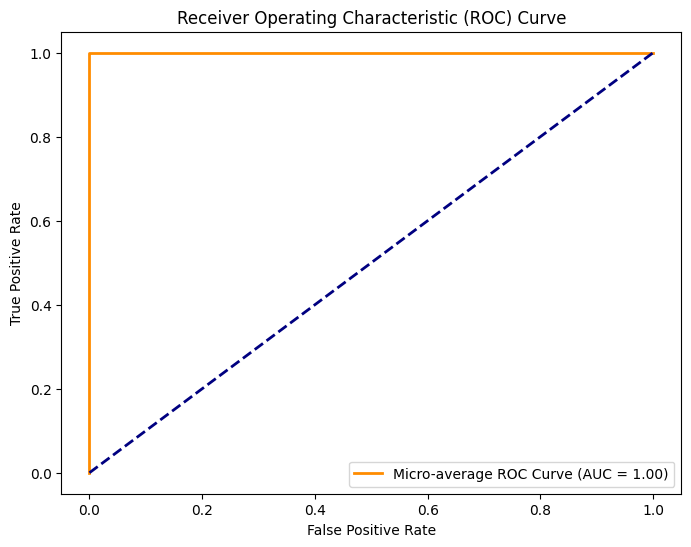

In [26]:
# ROC Curve for Multi-Class

# Binarize the labels
# y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
# y_pred_RFC_bin = label_binarize(y_pred_RFC, classes=np.unique(y_pred_RFC))

# Calculate ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()

# Loop over each class
for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_RFC_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and its AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_RFC_bin.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot micro-average ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr['micro'], tpr['micro'], color='darkorange', lw=2, label=f'Micro-average ROC Curve (AUC = {roc_auc["micro"]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred_LR = model_LR.predict(X_test)

In [ ]:
accuracy_LR = accuracy_score(y_test, y_pred_LR)
print(f'Accuracy: {accuracy_LR}')

Accuracy: 1.0


In [ ]:
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1672
           2       1.00      1.00      1.00       740
           3       1.00      1.00      1.00       747

    accuracy                           1.00      3159
   macro avg       1.00      1.00      1.00      3159
weighted avg       1.00      1.00      1.00      3159



In [ ]:
print(confusion_matrix(y_test, y_pred_LR))

[[1672    0    0]
 [   0  740    0]
 [   0    0  747]]


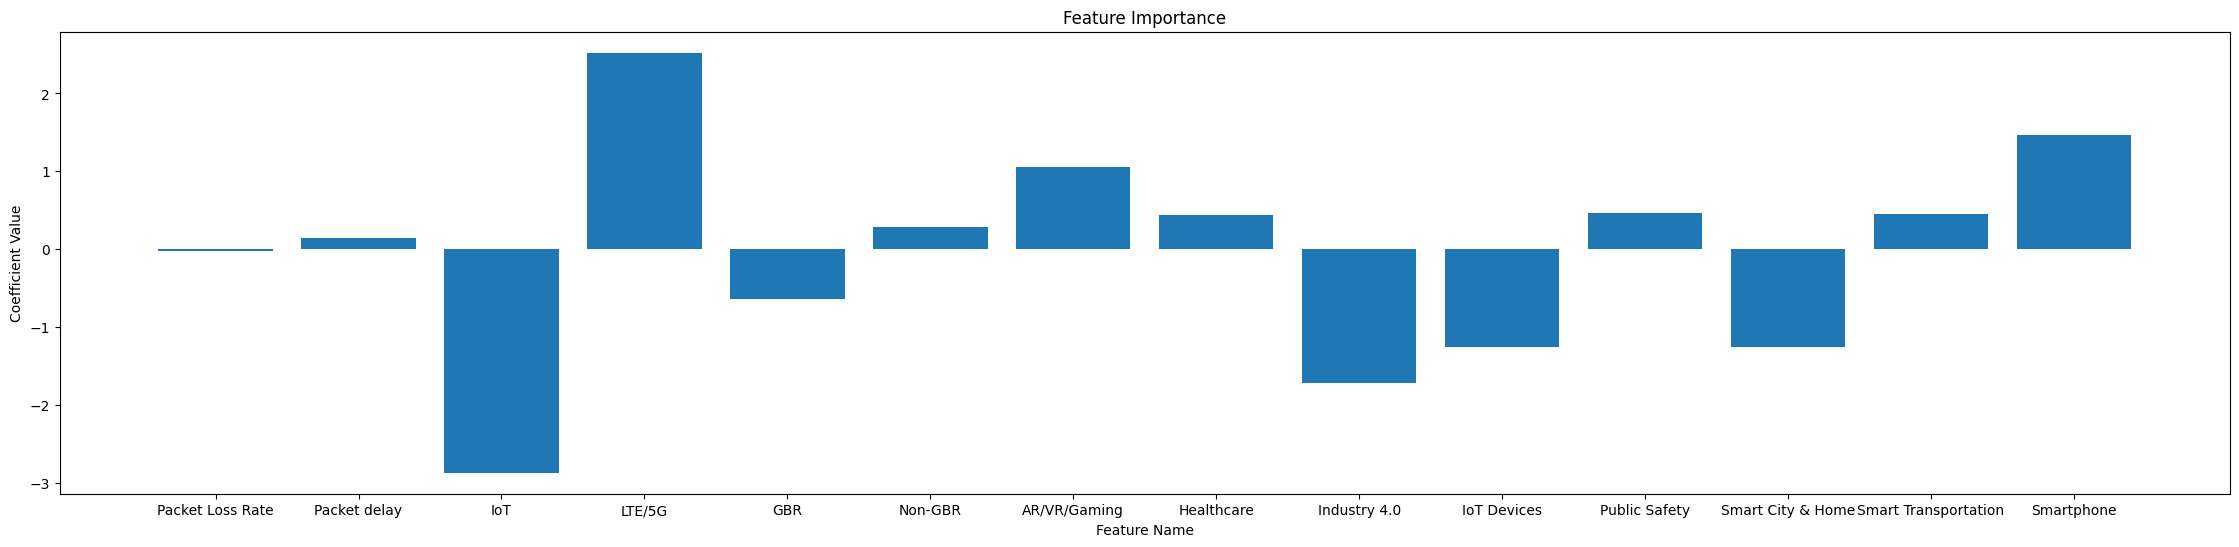

In [ ]:
# Feature Importance
feature_importance = model_LR.coef_[0]
# features = np.arange(len(feature_importance))

plt.figure(figsize=(2 * len(features), 6))
plt.bar(features, feature_importance)
plt.title('Feature Importance')
plt.xlabel('Feature Name')
plt.ylabel('Coefficient Value')
plt.show()

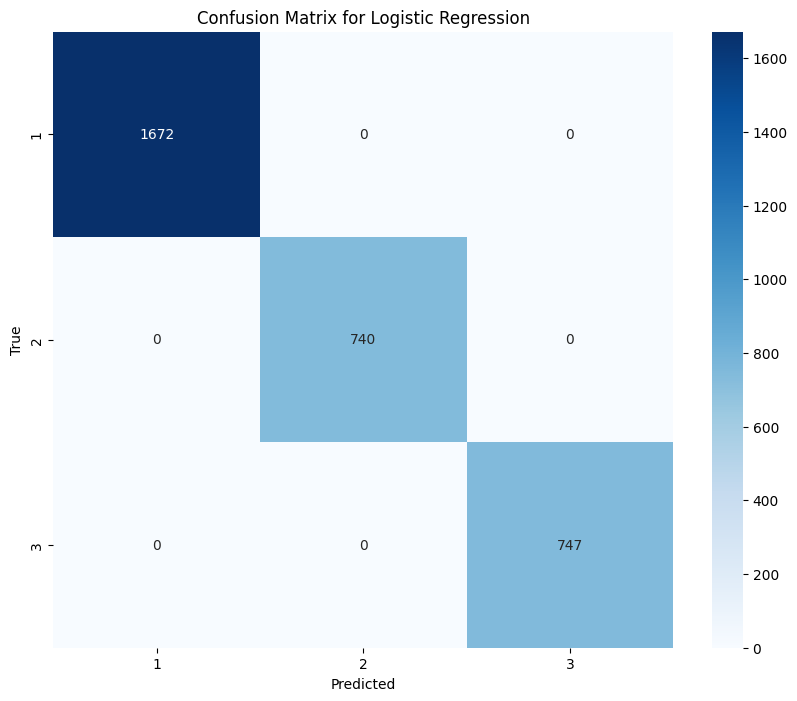

In [ ]:
# Confusion Matrix
cm_LR = confusion_matrix(y_test, y_pred_LR)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_LR, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')

# # Add a legend to indicate class labels
# classes = np.unique(y)
# plt.xticks(np.arange(len(classes)) + 0.5, classes, rotation=45)
# plt.yticks(np.arange(len(classes)) + 0.5, classes, rotation=0)

plt.show()

In [ ]:
# Get the column names from the original DataFrame
X_test_column_names = X.columns.tolist()

# Convert X_test to a pandas DataFrame
X_test_df_LR = pd.DataFrame(X_test, columns=X_test_column_names)  # Replace X_test_column_names with your actual column names
X_test_with_predictions_LR = X_test_df_LR.copy()  # Create a copy to avoid modifying the original DataFrame

# Resetting indices to avoid alignment issues
X_test_with_predictions_LR.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
y_pred_LR = pd.Series(y_pred_LR, name='Predicted_Slice_Type')  # Convert y_pred to a pandas Series

# Add y_test and y_pred columns to the DataFrame
X_test_with_predictions_LR['Actual_Slice_Type'] = y_test
X_test_with_predictions_LR['Predicted_Slice_Type'] = y_pred_LR

In [ ]:
X_test_with_predictions_LR.head(20)

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,Actual_Slice_Type,Predicted_Slice_Type
0,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0,3,3
1,0.010000,300,1,0,1,0,0,0,0,1,0,0,0,0,2,2
2,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0,3,3
3,0.010000,300,1,0,1,0,0,0,0,0,0,1,0,0,2,2
4,0.010000,50,1,0,0,1,0,0,0,0,0,1,0,0,2,2
5,0.010000,300,1,0,1,0,0,0,0,1,0,0,0,0,2,2
6,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0,3,3
7,0.001000,50,1,0,1,0,0,0,1,0,0,0,0,0,2,2
8,0.010000,300,1,0,1,0,0,0,0,1,0,0,0,0,2,2
9,0.010000,300,1,0,1,0,0,0,0,1,0,0,0,0,2,2


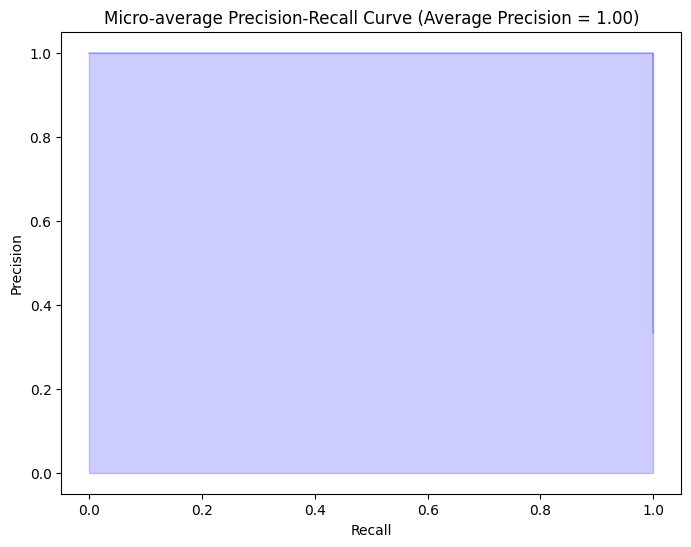

In [ ]:
# Precision-Recall Curve for Multi-Class

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_LR_bin = label_binarize(y_pred_LR, classes=np.unique(y_pred_LR))

# Calculate precision-recall curve
precision = dict()
recall = dict()
average_precision = dict()

# Loop over each class
for i in range(len(np.unique(y_test))):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_LR_bin[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_pred_LR_bin[:, i])

# Compute micro-average precision-recall curve and its average precision
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_pred_LR_bin.ravel())
average_precision["micro"] = average_precision_score(y_test_bin, y_pred_LR_bin, average="micro")

# Plot micro-average Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2, where='post')
plt.fill_between(recall["micro"], precision["micro"], step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Micro-average Precision-Recall Curve (Average Precision = {average_precision["micro"]:.2f})')
plt.show()

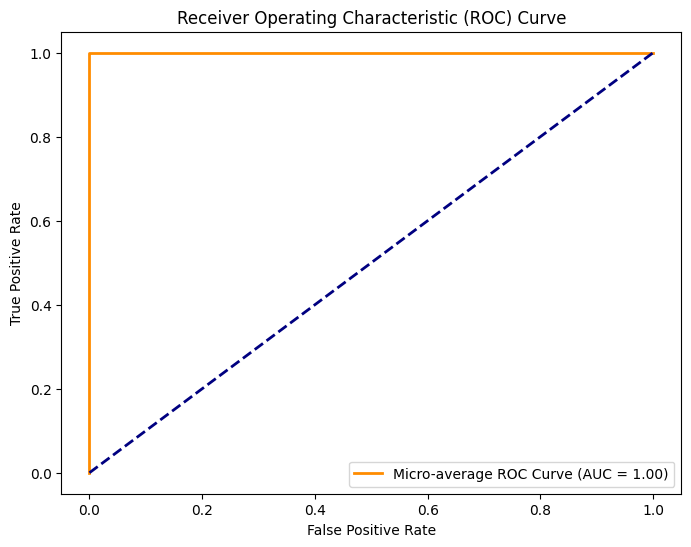

In [ ]:
# ROC Curve for Multi-Class

# Binarize the labels
# y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
# y_pred_LR_bin = label_binarize(y_pred_LR, classes=np.unique(y_pred_LR))

# Calculate ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()

# Loop over each class
for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_LR_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and its AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_LR_bin.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot micro-average ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr['micro'], tpr['micro'], color='darkorange', lw=2, label=f'Micro-average ROC Curve (AUC = {roc_auc["micro"]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_NB = model_NB.predict(X_test)

In [ ]:
accuracy_NB = accuracy_score(y_test, y_pred_NB)
print(f'Accuracy: {accuracy_NB}')

Accuracy: 1.0


In [ ]:
print(classification_report(y_test, y_pred_NB))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1672
           2       1.00      1.00      1.00       740
           3       1.00      1.00      1.00       747

    accuracy                           1.00      3159
   macro avg       1.00      1.00      1.00      3159
weighted avg       1.00      1.00      1.00      3159



In [ ]:
print(confusion_matrix(y_test, y_pred_NB))

[[1672    0    0]
 [   0  740    0]
 [   0    0  747]]


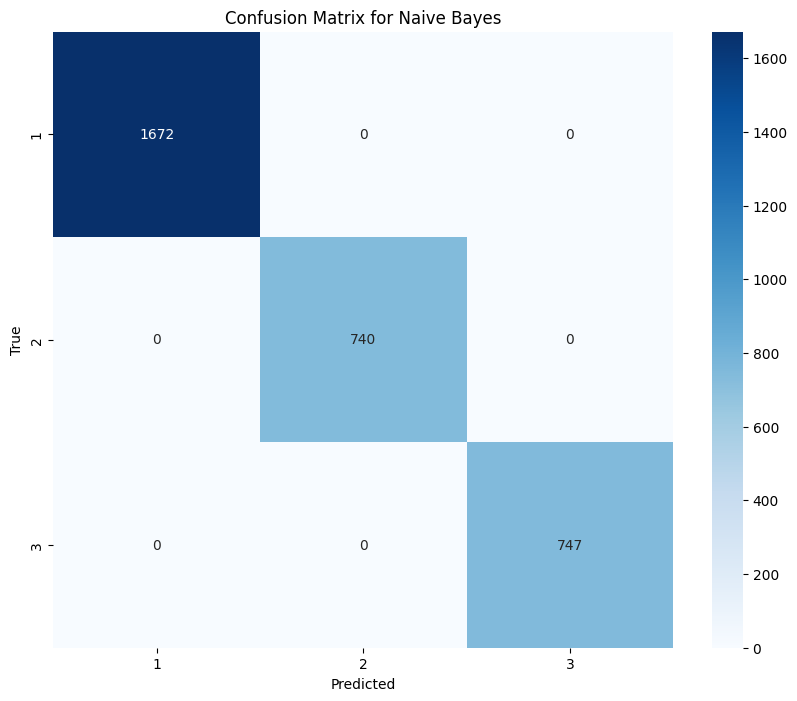

In [ ]:
# Confusion Matrix
cm_NB = confusion_matrix(y_test, y_pred_NB)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_NB, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('True')

# # Add a legend to indicate class labels
# classes = np.unique(y)
# plt.xticks(np.arange(len(classes)) + 0.5, classes, rotation=45)
# plt.yticks(np.arange(len(classes)) + 0.5, classes, rotation=0)

plt.show()

In [ ]:
# Get the column names from the original DataFrame
X_test_column_names = X.columns.tolist()

# Convert X_test to a pandas DataFrame
X_test_df_NB = pd.DataFrame(X_test, columns=X_test_column_names)  # Replace X_test_column_names with your actual column names
X_test_with_predictions_NB = X_test_df_NB.copy()  # Create a copy to avoid modifying the original DataFrame

# Resetting indices to avoid alignment issues
X_test_with_predictions_NB.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
y_pred_NB = pd.Series(y_pred_NB, name='Predicted_Slice_Type')  # Convert y_pred to a pandas Series

# Add y_test and y_pred columns to the DataFrame
X_test_with_predictions_NB['Actual_Slice_Type'] = y_test
X_test_with_predictions_NB['Predicted_Slice_Type'] = y_pred_NB

In [ ]:
X_test_with_predictions_NB.head(20)

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,Actual_Slice_Type,Predicted_Slice_Type
0,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0,3,3
1,0.010000,300,1,0,1,0,0,0,0,1,0,0,0,0,2,2
2,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0,3,3
3,0.010000,300,1,0,1,0,0,0,0,0,0,1,0,0,2,2
4,0.010000,50,1,0,0,1,0,0,0,0,0,1,0,0,2,2
5,0.010000,300,1,0,1,0,0,0,0,1,0,0,0,0,2,2
6,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0,3,3
7,0.001000,50,1,0,1,0,0,0,1,0,0,0,0,0,2,2
8,0.010000,300,1,0,1,0,0,0,0,1,0,0,0,0,2,2
9,0.010000,300,1,0,1,0,0,0,0,1,0,0,0,0,2,2


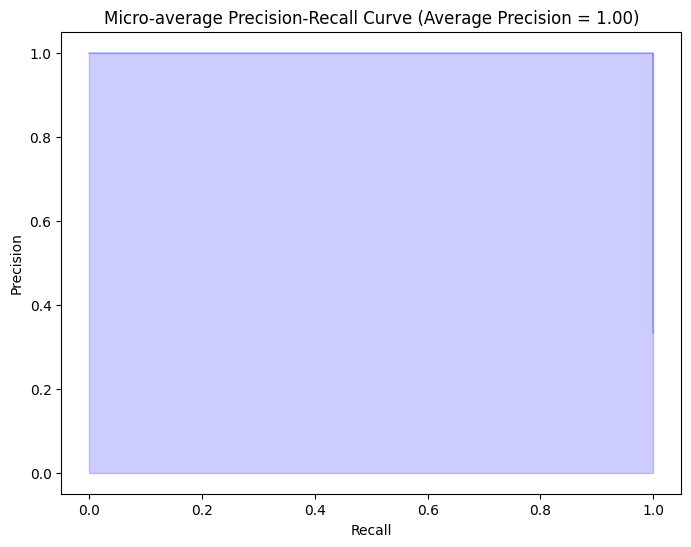

In [ ]:
# Precision-Recall Curve for Multi-Class

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_NB_bin = label_binarize(y_pred_NB, classes=np.unique(y_pred_NB))

# Calculate precision-recall curve
precision = dict()
recall = dict()
average_precision = dict()

# Loop over each class
for i in range(len(np.unique(y_test))):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_NB_bin[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_pred_NB_bin[:, i])

# Compute micro-average precision-recall curve and its average precision
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_pred_NB_bin.ravel())
average_precision["micro"] = average_precision_score(y_test_bin, y_pred_NB_bin, average="micro")

# Plot micro-average Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2, where='post')
plt.fill_between(recall["micro"], precision["micro"], step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Micro-average Precision-Recall Curve (Average Precision = {average_precision["micro"]:.2f})')
plt.show()

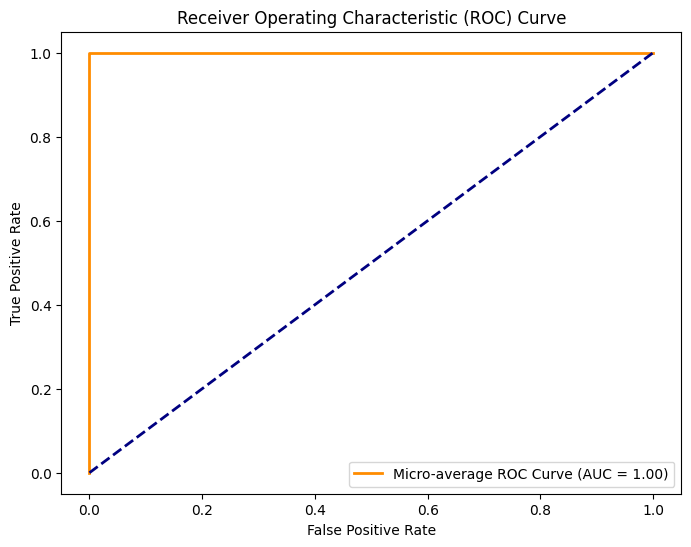

In [ ]:
# ROC Curve for Multi-Class

# Binarize the labels
# y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
# y_pred_NB_bin = label_binarize(y_pred_NB, classes=np.unique(y_pred_NB))

# Calculate ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()

# Loop over each class
for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_NB_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and its AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_NB_bin.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot micro-average ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr['micro'], tpr['micro'], color='darkorange', lw=2, label=f'Micro-average ROC Curve (AUC = {roc_auc["micro"]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Choose the number of neighbors (e.g., 3, 5, 7)
k = 5
model_KNN = KNeighborsClassifier(n_neighbors=k)
model_KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_KNN = model_KNN.predict(X_test)

In [ ]:
accuracy_KNN = accuracy_score(y_test, y_pred_KNN)
print(f'Accuracy: {accuracy_KNN}')

Accuracy: 1.0


In [ ]:
print(classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1672
           2       1.00      1.00      1.00       740
           3       1.00      1.00      1.00       747

    accuracy                           1.00      3159
   macro avg       1.00      1.00      1.00      3159
weighted avg       1.00      1.00      1.00      3159



In [ ]:
print(confusion_matrix(y_test, y_pred_KNN))

[[1672    0    0]
 [   0  740    0]
 [   0    0  747]]


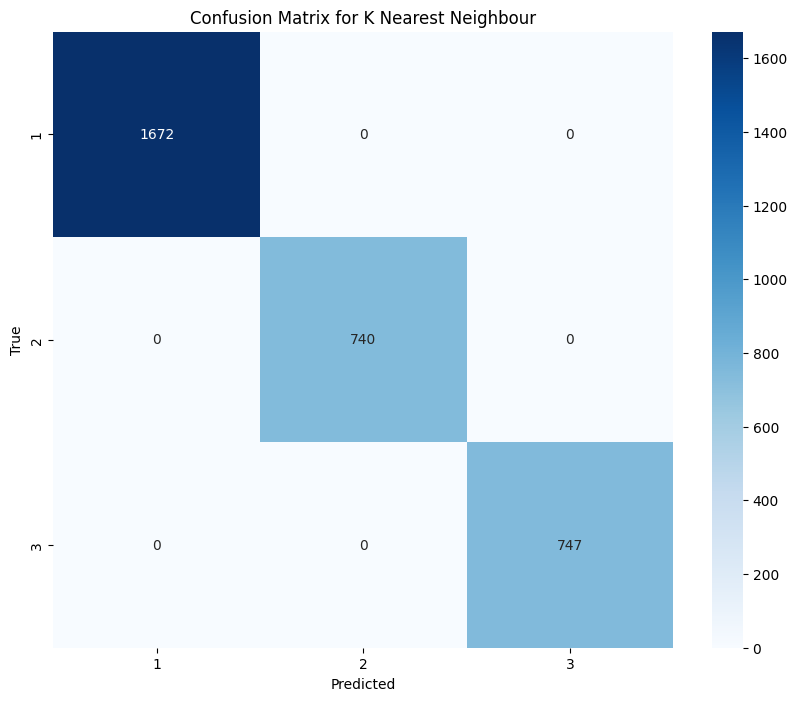

In [ ]:
# Confusion Matrix
cm_KNN = confusion_matrix(y_test, y_pred_KNN)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_KNN, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for K Nearest Neighbour')
plt.xlabel('Predicted')
plt.ylabel('True')

# # Add a legend to indicate class labels
# classes = np.unique(y)
# plt.xticks(np.arange(len(classes)) + 0.5, classes, rotation=45)
# plt.yticks(np.arange(len(classes)) + 0.5, classes, rotation=0)

plt.show()

In [ ]:
# Get the column names from the original DataFrame
X_test_column_names = X.columns.tolist()

# Convert X_test to a pandas DataFrame
X_test_df_KNN = pd.DataFrame(X_test, columns=X_test_column_names)  # Replace X_test_column_names with your actual column names
X_test_with_predictions_KNN = X_test_df_KNN.copy()  # Create a copy to avoid modifying the original DataFrame

# Resetting indices to avoid alignment issues
X_test_with_predictions_KNN.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
y_pred_KNN = pd.Series(y_pred_KNN, name='Predicted_Slice_Type')  # Convert y_pred to a pandas Series

# Add y_test and y_pred columns to the DataFrame
X_test_with_predictions_KNN['Actual_Slice_Type'] = y_test
X_test_with_predictions_KNN['Predicted_Slice_Type'] = y_pred_KNN

In [ ]:
X_test_with_predictions_KNN.head(20)

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,Actual_Slice_Type,Predicted_Slice_Type
0,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0,3,3
1,0.010000,300,1,0,1,0,0,0,0,1,0,0,0,0,2,2
2,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0,3,3
3,0.010000,300,1,0,1,0,0,0,0,0,0,1,0,0,2,2
4,0.010000,50,1,0,0,1,0,0,0,0,0,1,0,0,2,2
5,0.010000,300,1,0,1,0,0,0,0,1,0,0,0,0,2,2
6,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0,3,3
7,0.001000,50,1,0,1,0,0,0,1,0,0,0,0,0,2,2
8,0.010000,300,1,0,1,0,0,0,0,1,0,0,0,0,2,2
9,0.010000,300,1,0,1,0,0,0,0,1,0,0,0,0,2,2


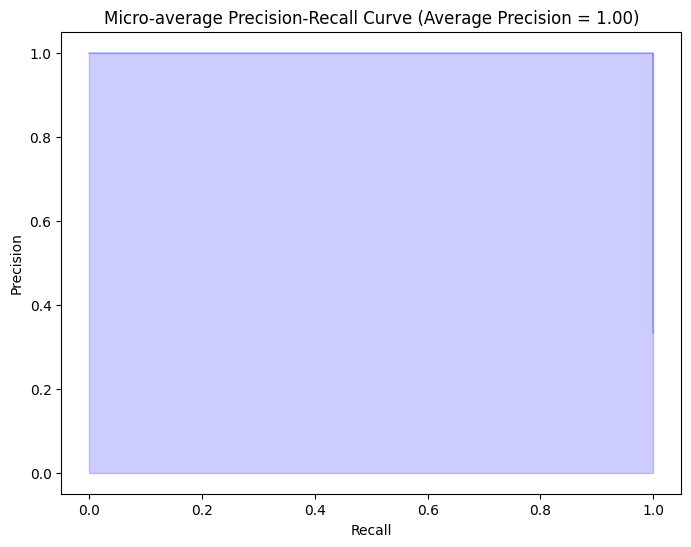

In [ ]:
# Precision-Recall Curve for Multi-Class

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_KNN_bin = label_binarize(y_pred_KNN, classes=np.unique(y_pred_KNN))

# Calculate precision-recall curve
precision = dict()
recall = dict()
average_precision = dict()

# Loop over each class
for i in range(len(np.unique(y_test))):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_KNN_bin[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_pred_KNN_bin[:, i])

# Compute micro-average precision-recall curve and its average precision
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_pred_KNN_bin.ravel())
average_precision["micro"] = average_precision_score(y_test_bin, y_pred_KNN_bin, average="micro")

# Plot micro-average Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2, where='post')
plt.fill_between(recall["micro"], precision["micro"], step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Micro-average Precision-Recall Curve (Average Precision = {average_precision["micro"]:.2f})')
plt.show()

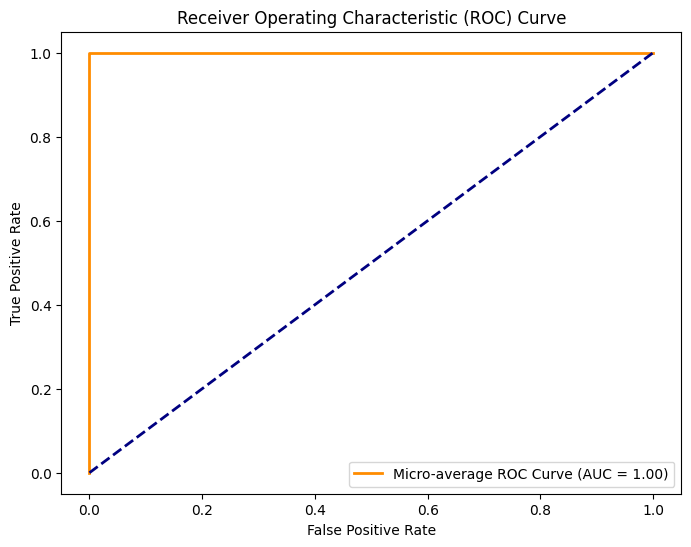

In [ ]:
# ROC Curve for Multi-Class

# Binarize the labels
# y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
# y_pred_KNN_bin = label_binarize(y_pred_KNN, classes=np.unique(y_pred_KNN))

# Calculate ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()

# Loop over each class
for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_KNN_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and its AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_KNN_bin.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot micro-average ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr['micro'], tpr['micro'], color='darkorange', lw=2, label=f'Micro-average ROC Curve (AUC = {roc_auc["micro"]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_DT = DecisionTreeClassifier(random_state=42)
model_DT.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_DT = model_DT.predict(X_test)

In [ ]:
accuracy_DT = accuracy_score(y_test, y_pred_DT)
print(f'Accuracy: {accuracy_DT}')

Accuracy: 1.0


In [ ]:
print(classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1672
           2       1.00      1.00      1.00       740
           3       1.00      1.00      1.00       747

    accuracy                           1.00      3159
   macro avg       1.00      1.00      1.00      3159
weighted avg       1.00      1.00      1.00      3159



In [ ]:
print(confusion_matrix(y_test, y_pred_DT))

[[1672    0    0]
 [   0  740    0]
 [   0    0  747]]


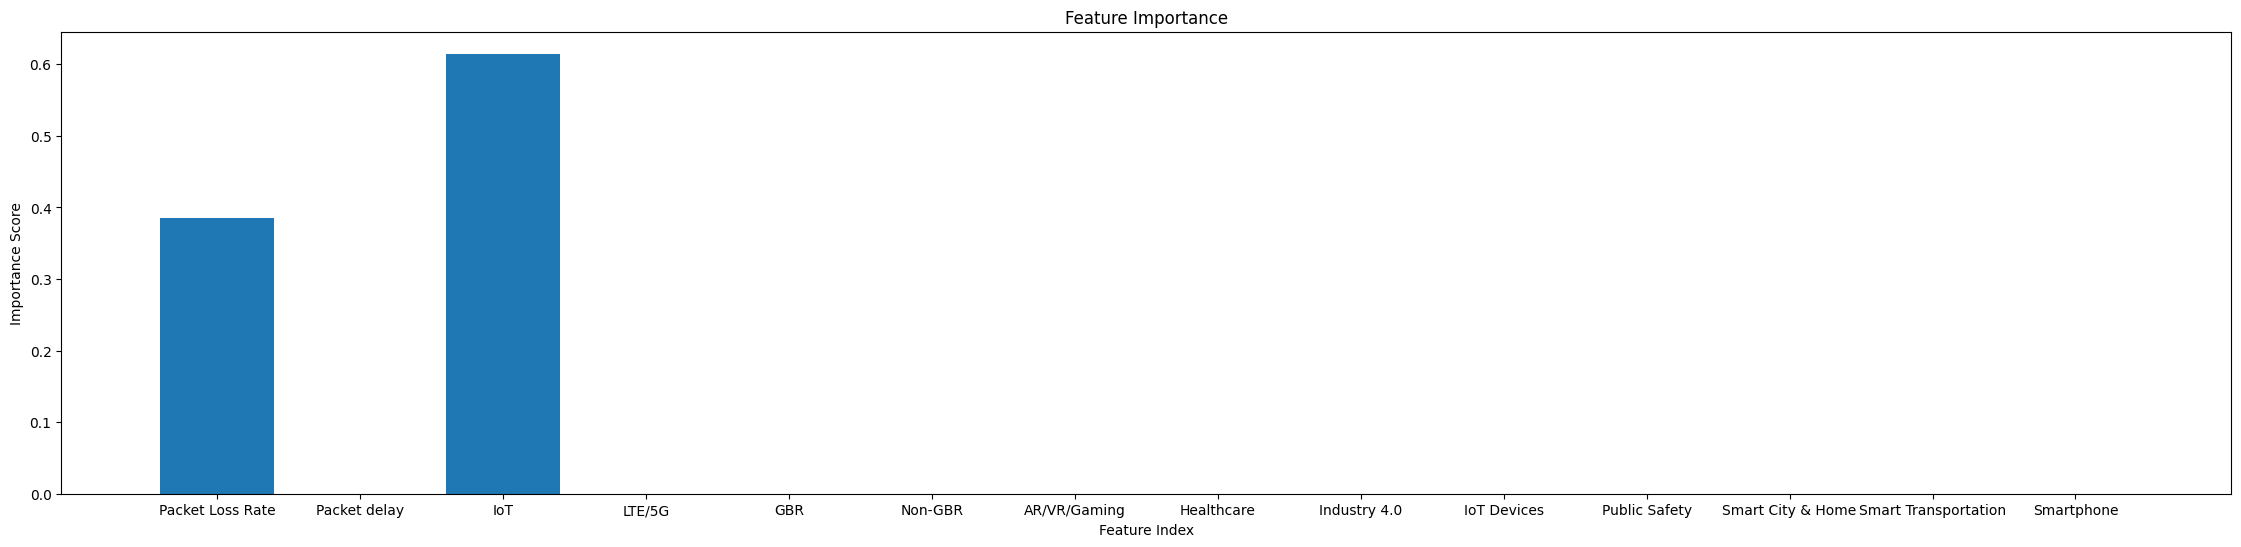

In [ ]:
# Feature Importance
feature_importance = model_DT.feature_importances_
# features = np.arange(len(feature_importance))

plt.figure(figsize=(2 * len(features), 6))
plt.bar(features, feature_importance)
plt.title('Feature Importance')
plt.xlabel('Feature Index')
plt.ylabel('Importance Score')
plt.show()

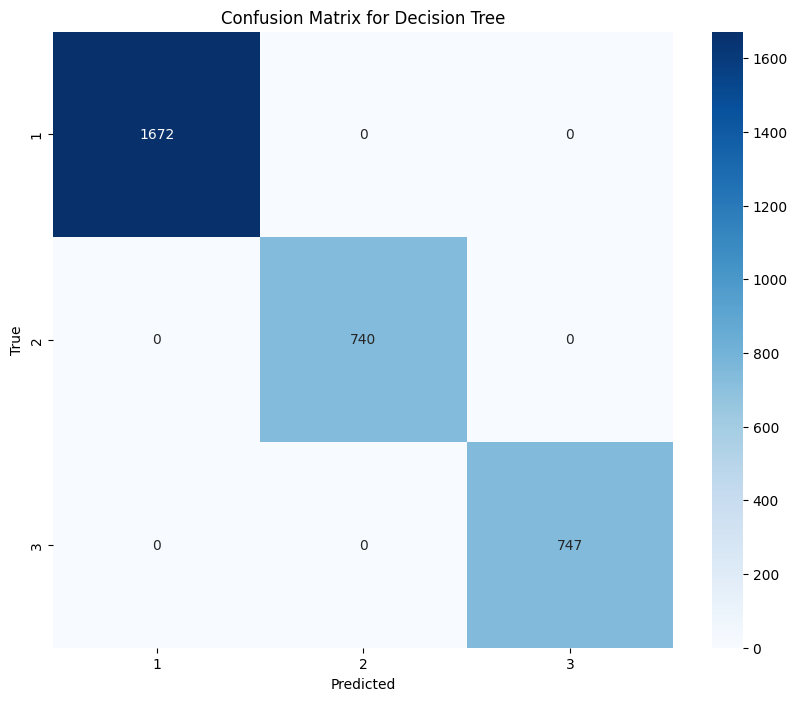

In [ ]:
# Confusion Matrix
cm_DT = confusion_matrix(y_test, y_pred_DT)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_DT, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('True')

# # Add a legend to indicate class labels
# classes = np.unique(y)
# plt.xticks(np.arange(len(classes)) + 0.5, classes, rotation=45)
# plt.yticks(np.arange(len(classes)) + 0.5, classes, rotation=0)

plt.show()

In [ ]:
# Get the column names from the original DataFrame
X_test_column_names = X.columns.tolist()

# Convert X_test to a pandas DataFrame
X_test_df_DT = pd.DataFrame(X_test, columns=X_test_column_names)  # Replace X_test_column_names with your actual column names
X_test_with_predictions_DT = X_test_df_DT.copy()  # Create a copy to avoid modifying the original DataFrame

# Resetting indices to avoid alignment issues
X_test_with_predictions_DT.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
y_pred_DT = pd.Series(y_pred_DT, name='Predicted_Slice_Type')  # Convert y_pred to a pandas Series

# Add y_test and y_pred columns to the DataFrame
X_test_with_predictions_DT['Actual_Slice_Type'] = y_test
X_test_with_predictions_DT['Predicted_Slice_Type'] = y_pred_DT

In [ ]:
X_test_with_predictions_DT.head(20)

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,Actual_Slice_Type,Predicted_Slice_Type
0,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0,3,3
1,0.010000,300,1,0,1,0,0,0,0,1,0,0,0,0,2,2
2,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0,3,3
3,0.010000,300,1,0,1,0,0,0,0,0,0,1,0,0,2,2
4,0.010000,50,1,0,0,1,0,0,0,0,0,1,0,0,2,2
5,0.010000,300,1,0,1,0,0,0,0,1,0,0,0,0,2,2
6,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0,3,3
7,0.001000,50,1,0,1,0,0,0,1,0,0,0,0,0,2,2
8,0.010000,300,1,0,1,0,0,0,0,1,0,0,0,0,2,2
9,0.010000,300,1,0,1,0,0,0,0,1,0,0,0,0,2,2


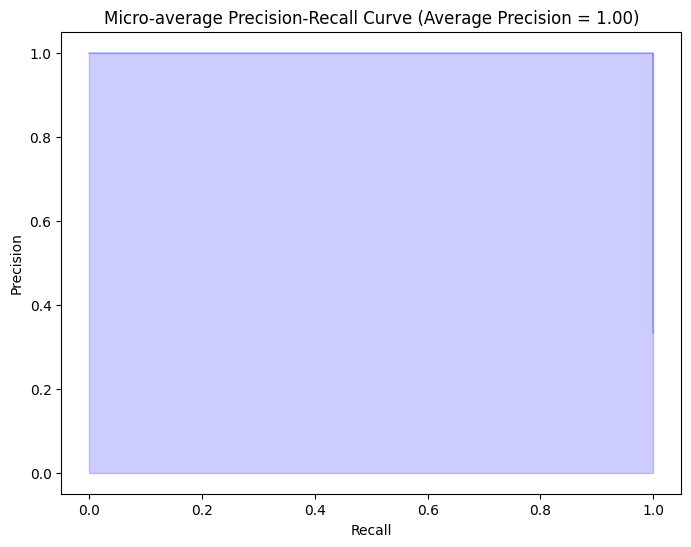

In [ ]:
# Precision-Recall Curve for Multi-Class

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_DT_bin = label_binarize(y_pred_DT, classes=np.unique(y_pred_DT))

# Calculate precision-recall curve
precision = dict()
recall = dict()
average_precision = dict()

# Loop over each class
for i in range(len(np.unique(y_test))):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_DT_bin[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_pred_DT_bin[:, i])

# Compute micro-average precision-recall curve and its average precision
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_pred_DT_bin.ravel())
average_precision["micro"] = average_precision_score(y_test_bin, y_pred_DT_bin, average="micro")

# Plot micro-average Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2, where='post')
plt.fill_between(recall["micro"], precision["micro"], step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Micro-average Precision-Recall Curve (Average Precision = {average_precision["micro"]:.2f})')
plt.show()

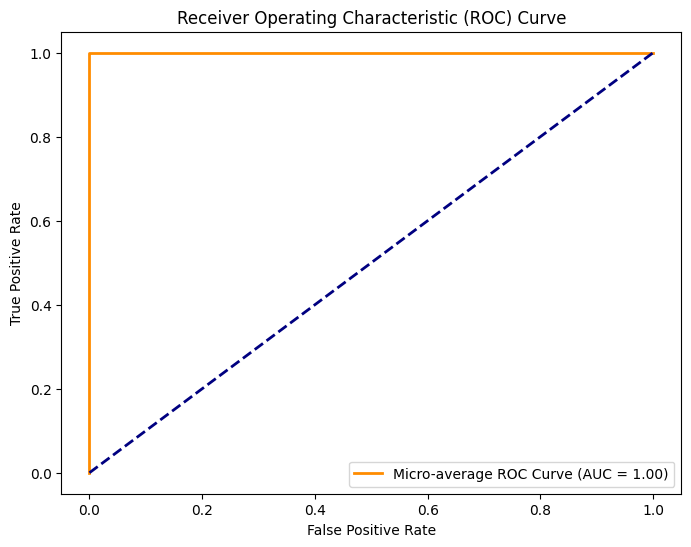

In [ ]:
# ROC Curve for Multi-Class

# Binarize the labels
# y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
# y_pred_DT_bin = label_binarize(y_pred_DT, classes=np.unique(y_pred_DT))

# Calculate ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()

# Loop over each class
for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_DT_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and its AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_DT_bin.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot micro-average ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr['micro'], tpr['micro'], color='darkorange', lw=2, label=f'Micro-average ROC Curve (AUC = {roc_auc["micro"]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# **Support Vector Machine**

In [ ]:
from sklearn.svm import SVC

In [ ]:
# Types of SVM (linear, polynomial, radial basis function, etc.)
# Here, we use a linear kernel for simplicity
model_SVM = SVC(kernel='linear')
model_SVM.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred_SVM = model_SVM.predict(X_test)

In [ ]:
accuracy_SVM = accuracy_score(y_test, y_pred_SVM)
print(f'Accuracy: {accuracy_SVM}')

Accuracy: 1.0


In [ ]:
print(classification_report(y_test, y_pred_SVM))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1672
           2       1.00      1.00      1.00       740
           3       1.00      1.00      1.00       747

    accuracy                           1.00      3159
   macro avg       1.00      1.00      1.00      3159
weighted avg       1.00      1.00      1.00      3159



In [ ]:
print(confusion_matrix(y_test, y_pred_SVM))

[[1672    0    0]
 [   0  740    0]
 [   0    0  747]]


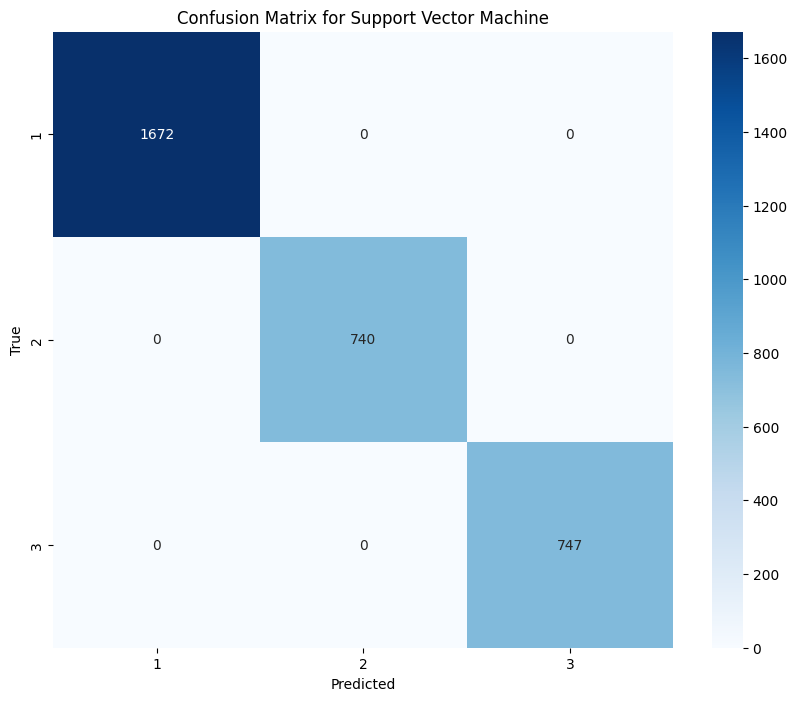

In [ ]:
# Confusion Matrix
cm_SVM = confusion_matrix(y_test, y_pred_SVM)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_SVM, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for Support Vector Machine')
plt.xlabel('Predicted')
plt.ylabel('True')

# # Add a legend to indicate class labels
# classes = np.unique(y)
# plt.xticks(np.arange(len(classes)) + 0.5, classes, rotation=45)
# plt.yticks(np.arange(len(classes)) + 0.5, classes, rotation=0)

plt.show()

In [ ]:
# Get the column names from the original DataFrame
X_test_column_names = X.columns.tolist()

# Convert X_test to a pandas DataFrame
X_test_df_SVM = pd.DataFrame(X_test, columns=X_test_column_names)  # Replace X_test_column_names with your actual column names
X_test_with_predictions_SVM = X_test_df_SVM.copy()  # Create a copy to avoid modifying the original DataFrame

# Resetting indices to avoid alignment issues
X_test_with_predictions_SVM.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
y_pred = pd.Series(y_pred_SVM, name='Predicted_Slice_Type')  # Convert y_pred to a pandas Series

# Add y_test and y_pred columns to the DataFrame
X_test_with_predictions_SVM['Actual_Slice_Type'] = y_test
X_test_with_predictions_SVM['Predicted_Slice_Type'] = y_pred_SVM

In [ ]:
X_test_with_predictions_SVM.head(20)

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,Actual_Slice_Type,Predicted_Slice_Type
0,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0,3,3
1,0.010000,300,1,0,1,0,0,0,0,1,0,0,0,0,2,2
2,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0,3,3
3,0.010000,300,1,0,1,0,0,0,0,0,0,1,0,0,2,2
4,0.010000,50,1,0,0,1,0,0,0,0,0,1,0,0,2,2
5,0.010000,300,1,0,1,0,0,0,0,1,0,0,0,0,2,2
6,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0,3,3
7,0.001000,50,1,0,1,0,0,0,1,0,0,0,0,0,2,2
8,0.010000,300,1,0,1,0,0,0,0,1,0,0,0,0,2,2
9,0.010000,300,1,0,1,0,0,0,0,1,0,0,0,0,2,2


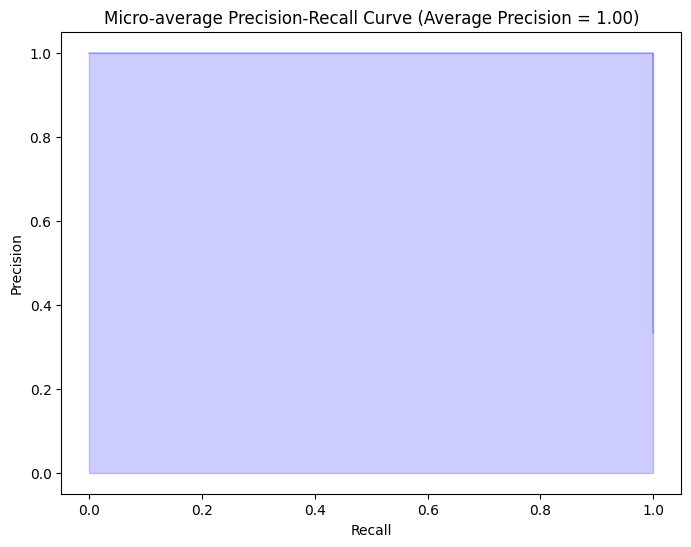

In [ ]:
# Precision-Recall Curve for Multi-Class

# Binarize the labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_SVM_bin = label_binarize(y_pred_SVM, classes=np.unique(y_pred_SVM))

# Calculate precision-recall curve
precision = dict()
recall = dict()
average_precision = dict()

# Loop over each class
for i in range(len(np.unique(y_test))):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_SVM_bin[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_pred_SVM_bin[:, i])

# Compute micro-average precision-recall curve and its average precision
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_pred_SVM_bin.ravel())
average_precision["micro"] = average_precision_score(y_test_bin, y_pred_SVM_bin, average="micro")

# Plot micro-average Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2, where='post')
plt.fill_between(recall["micro"], precision["micro"], step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Micro-average Precision-Recall Curve (Average Precision = {average_precision["micro"]:.2f})')
plt.show()

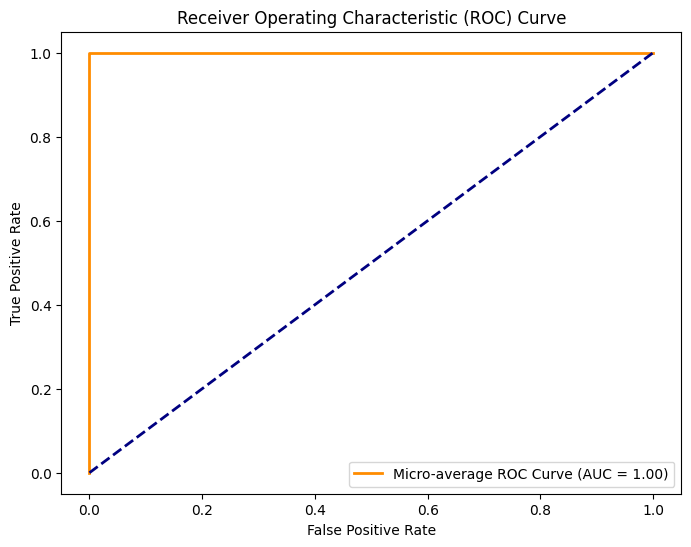

In [ ]:
# ROC Curve for Multi-Class

# Binarize the labels
# y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
# y_pred_SVM_bin = label_binarize(y_pred_SVM, classes=np.unique(y_pred_SVM))

# Calculate ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()

# Loop over each class
for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_SVM_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and its AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_SVM_bin.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot micro-average ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr['micro'], tpr['micro'], color='darkorange', lw=2, label=f'Micro-average ROC Curve (AUC = {roc_auc["micro"]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# **SYNC NOTEBOOKS**

In [ ]:
%cp '/content/drive/MyDrive/Colab Notebooks/Exp1 - Slice_Classification_SupML.ipynb' '/content/drive/MyDrive/Network_Slicing_with_ML_repo/Network-Slicing-with-ML/Notebooks/'